**Business Problem: House Price Prediction Using Machine Learning**

As a real estate company, we often face challenges in accurately pricing houses. Prices depend on several factors like location, size, number of rooms, and other amenities, but manually predicting the right price can be time-consuming and subjective. We want to build a machine learning model that can predict house prices based on these key features. By doing so, we hope to offer more competitive and accurate pricing, helping both sellers and buyers make better, data-driven decisions in the real estate market.

**Project Goal :-**  

The goal of this project is to develop a machine learning model that accurately predicts house prices based on key features like location, size, number of rooms, and amenities. This model aims to assist real estate stakeholders in making data-driven decisions by providing reliable price estimates.

**Loading Libraries :-**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading datasets :-**

In [281]:
df = pd.read_csv('housing_price.csv')

**Understanding data :-**

In [171]:
df.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19886    -119.13     36.30                  33         3379           612.0   
15638    -122.41     37.79                  52         3598          1011.0   
16527    -121.21     37.81                  12         3667           640.0   
15707    -122.43     37.79                  50         3312          1095.0   
8238     -118.18     33.77                  39         1645           547.0   

       population  households  median_income  median_house_value  \
19886        1565         618         2.7321               76500   
15638        2062         966         2.9871              380000   
16527        2173         652         5.0369              163900   
15707        1475         997         2.7165              500001   
8238         1339         499         1.5536              155000   

      ocean_proximity  
19886          INLAND  
15638        NEAR BAY  
16527          INLAND  
15707        NEAR BAY  
8238       NEAR OCEAN

1. Median House Value: The target variable representing the median value of houses in the block group (in USD 100,000s).
2. Median Income: Median income of households in the block group, normalized (e.g., 3 represents $30,000).
3. Housing Median Age: Median age of houses in the block group, indicating how old the houses are.
4. Total Rooms: Total number of rooms in all houses within the block group.
5. Total Bedrooms: Total number of bedrooms in all houses within the block group.
6. Population: Total population residing in the block group.
7. Households: Total number of households (housing units) in the block group.
8. Latitude: The north-south geographic coordinate of the block group.
9. Longitude: The east-west geographic coordinate of the block group.
10. Ocean Proximity: A categorical variable indicating the block group's proximity to te ocean.


In [12]:
df.shape

(20640, 10)

The dataset contains 20,640 rows and 10 columns.

Rows represent individual block groups, and columns represent different features such as house characteristics, population, and geographic location.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB



- The dataset contains **20,640 entries** and **10 columns**.
- Each column provides specific information about housing, population, and geographic details.
- Column-wise details:
  - **Data Types**: 
    - `float64`: 4 columns (e.g., `longitude`, `latitude`, `median_income`)
    - `int64`: 5 columns (e.g., `housing_median_age`, `population`)
    - `object`: 1 column (`ocean_proximity`).
  - **Null Values**: 
    - All columns except `total_bedrooms` have complete data. 
    - The `total_bedrooms` column has **20433 non-null values**, meaning **207 missing values**.
- **Memory Usage**: The dataset occupies approximately **1.6 MB* the dataset.


In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


- Most columns in the dataset have **no missing values**.
- The column **`total_bedrooms`** has **207 missing values** out of 20,640 entries.
- No other columns contain missing dling.


In [16]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000


The `df.describe()` function shows that most columns have 20,640 entries. The **median_income** has an average of 3.87, and **median_house_value** ranges from 149,900 to 500,000. The statistics provide insight into data distribution and potential outliers.


In [23]:
df.duplicated().sum()

0


The dataset has **0 duplicate rows**, indicating that there are no repeated entries in the dat.


In [18]:
df.corr(numeric_only=True)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

The `df.corr()` function shows the correlation between numerical features in the dataset. Key observations:
- **`median_income`** has a strong positive correlation with **`median_house_value`**, indicating that higher incomes are associated with higher house prices.
- **`total_rooms`** and **`households`** show a moderate correlation, reflecting the relationship between the size of the housing area and the number of households.
- Most other correlations are relatively weak, suggesting limited linear relationships between other features.


**EDA - Univariate-Analysis**

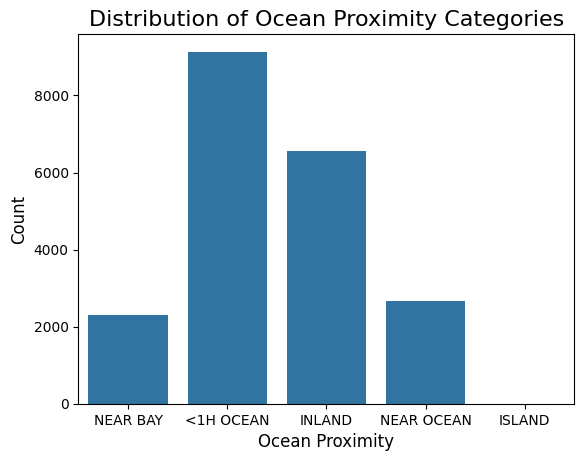

In [22]:
sns.countplot(data = df, x = 'ocean_proximity')
plt.title('Distribution of Ocean Proximity Categories', fontsize=16)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


The countplot visualizes the distribution of the `ocean_proximity` feature. It shows the number of houses in each category:
- **`<1H OCEAN`** (houses close to the ocean) appears to have the highest count.
- **`INLAND`** (inland houses) also has a significant proportion, while categories like **`NEAR OCEAN`** and **`NEAR BAY`** have relatively fewer houses.

This visualization helps to understand the spread of housing locations relative to the ocean in the dataset.


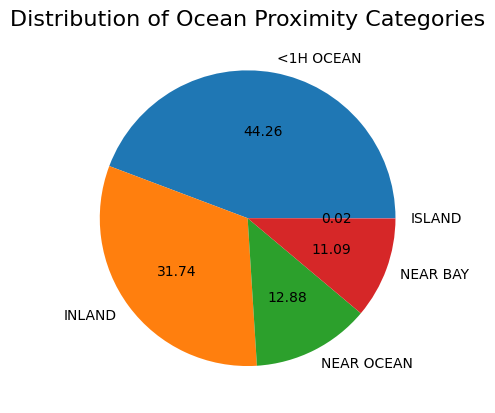

In [25]:
df['ocean_proximity'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title('Distribution of Ocean Proximity Categories', fontsize=16)
plt.ylabel('')
plt.show()

The pie chart shows the distribution of the `ocean_proximity` feature in the dataset:
- The chart provides the percentage share of each category, such as **`<1H OCEAN`**, **`INLAND`**, and others.
- This visualization highlights the proportion of houses located near the ocean, inland, or close to the bay, offering insights into the geographical spread of the dataset.

This helps in understanding the distribution of properties based on their proximity to the ocean.


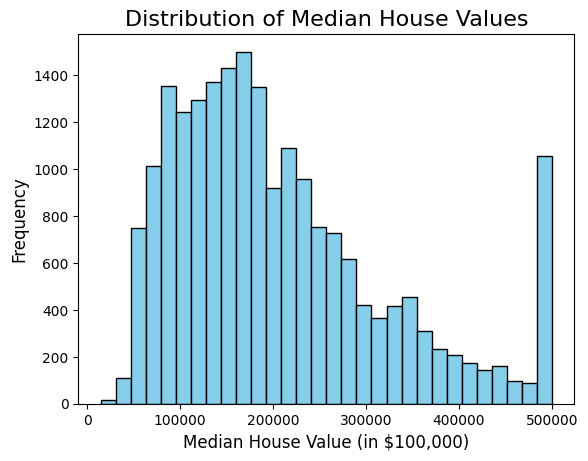

In [27]:
plt.hist(df['median_house_value'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Values', fontsize=16)
plt.xlabel('Median House Value (in $100,000)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



The histogram visualizes the distribution of **`median_house_value`** in the dataset:
- The chart shows how house prices are spread across different ranges, with most houses concentrated within a certain price range.
- The x-axis represents the **median house value** (in units of $100,000), and the y-axis shows the **frequency** of houses within each price range.
- This distribution helps in understanding the central tendency and spread of house prices, as well as identifying any skewness or outlers.


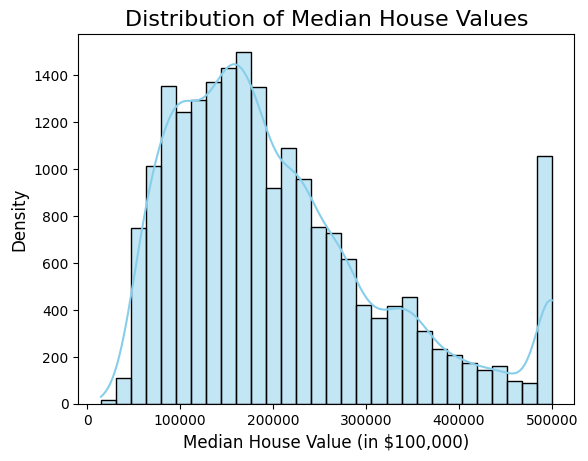

In [29]:
sns.histplot(df['median_house_value'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Values', fontsize=16)
plt.xlabel('Median House Value (in $100,000)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

The plot shows the distribution of **`median_house_value`** with both a histogram and a kernel density estimate (KDE):
- The x-axis represents the **median house value** (in units of $100,000), and the y-axis shows the **density**.
- The histogram provides insight into the frequency distribution, while the KDE curve gives a smoothed view of the data's distribution.
- This helps identify patterns, skewness, and the overall spread of house prices in the dataset.

In [30]:
df['median_house_value'].skew()

0.9777632739098341


The skewness of the **`median_house_value`** column is **0.9777**, which indicates that the distribution of house prices is **positively skewed**.
- A positive skew means that the tail of the distribution is stretched towards higher values, suggesting that most houses are priced lower, with a few high-priced outliers.
- This insight is useful for understanding the distribution and potential need for transformations in further analysis or modelng.


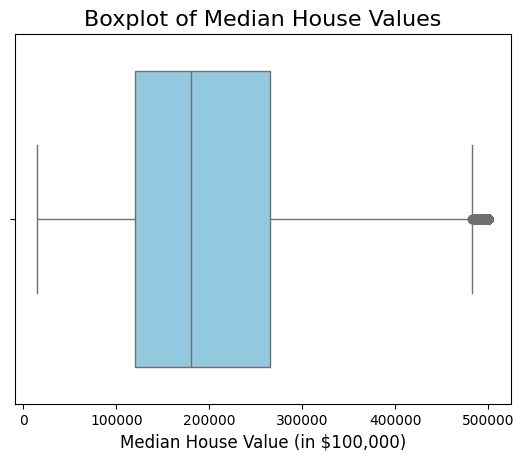

In [32]:
sns.boxplot(data=df, x='median_house_value', color='skyblue')
plt.title('Boxplot of Median House Values', fontsize=16)
plt.xlabel('Median House Value (in $100,000)', fontsize=12)
plt.show()


The boxplot visualizes the distribution of **`median_house_value`** in the dataset:
- The box represents the **interquartile range (IQR)**, which contains 50% of the data.
- The line inside the box marks the **median** value of the house prices.
- The "whiskers" show the range of data, and any points outside this range are potential **outliers**.
- The plot helps to identify the central tendency, spread, and presence of extreme values in house prices.


**EDA - Bivariate and Multivariate**

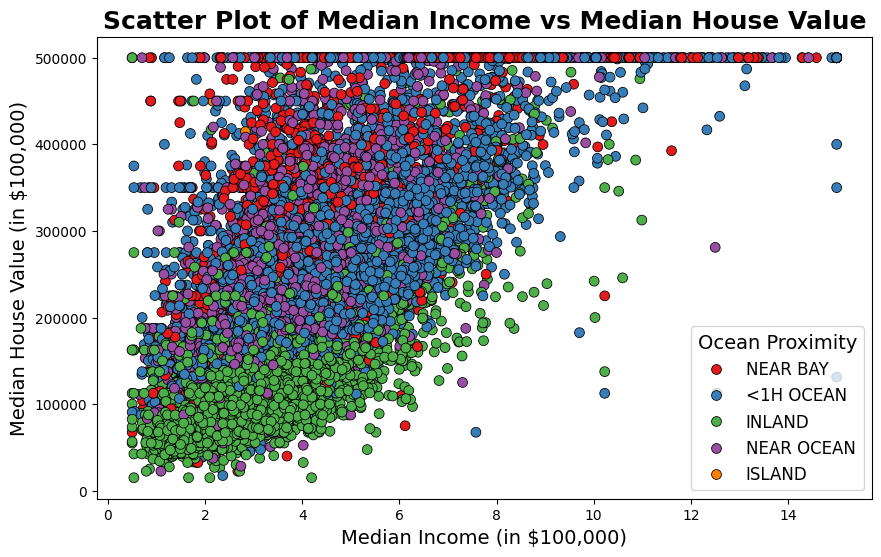

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='ocean_proximity', palette='Set1', marker='o', s=50, edgecolor='black')
plt.title('Scatter Plot of Median Income vs Median House Value', fontsize=18, fontweight='bold')
plt.xlabel('Median Income (in $100,000)', fontsize=14)
plt.ylabel('Median House Value (in $100,000)', fontsize=14)
plt.legend(title='Ocean Proximity', fontsize=12, title_fontsize=14)
plt.show()


The scatter plot illustrates the relationship between **`median_income`** and **`median_house_value`**, with points colored according to the **`ocean_proximity`** feature:
- The plot clearly displays how **median income** correlates with **median house value**, categorized by different ocean proximity groups.
- Larger, bolded markers and a color palette help differentiate the data points, making trends and relationships easier to interpret.
- The addition of edge colors and a legend further enhances clarity.
- This visualization helps identify patterns and outliers in the dataset, especially across different ocean proximity categries.


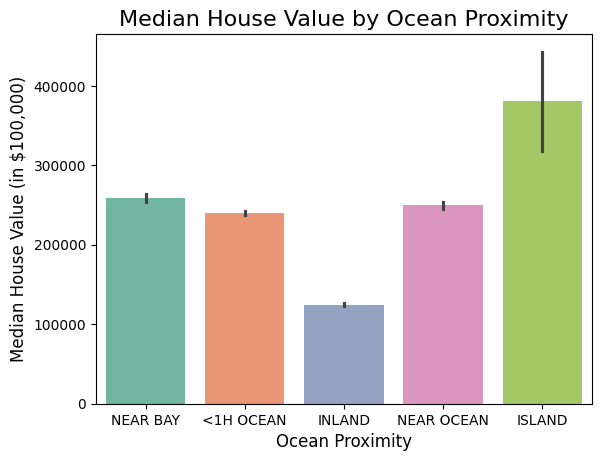

In [39]:
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', hue='ocean_proximity', palette='Set2', legend=False)
plt.title('Median House Value by Ocean Proximity', fontsize=16)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Median House Value (in $100,000)', fontsize=12)
plt.show()


This bar plot shows the average **`median_house_value`** for each category of **`ocean_proximity`**:
- The **`hue`** parameter is used to color the bars based on the **`ocean_proximity`** feature, making it easier to visually distinguish between different proximity categories.
- Each bar represents the average house value in a particular proximity category, such as **`<1H OCEAN`**, **`INLAND`**, and others.
- The **`Set2`** color palette enhances the readability of the plot and helps highlight differences between categories.
- This visualization is useful for identifying how proximity to the ocean may influence house values.


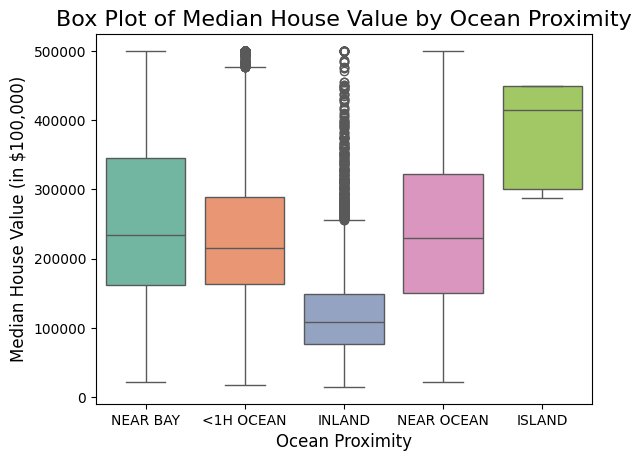

In [42]:
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', hue='ocean_proximity', palette='Set2')
plt.title('Box Plot of Median House Value by Ocean Proximity', fontsize=16)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Median House Value (in $100,000)', fontsize=12)
plt.show()


This box plot visualizes the distribution of **`median_house_value`** across different **`ocean_proximity`** categories:
- The **`hue`** parameter is used to color the boxes based on the **`ocean_proximity`** feature, making it easier to visually distinguish between categories such as **`<1H OCEAN`**, **`INLAND`**, etc.
- Each **box** shows the interquartile range (IQR) of house values, with the **median line** indicating the middle value.
- The **whiskers** extend to the minimum and maximum values within 1.5 * IQR, and outliers are shown individually as points outside the whiskers.
- The **Set2 palette** provides a pleasant color distinction for each proximity category, helping to compare house value distributions across the categories.
- This plot helps identify differences in house values between various ocean proximity areas and any potential outliers in each group.


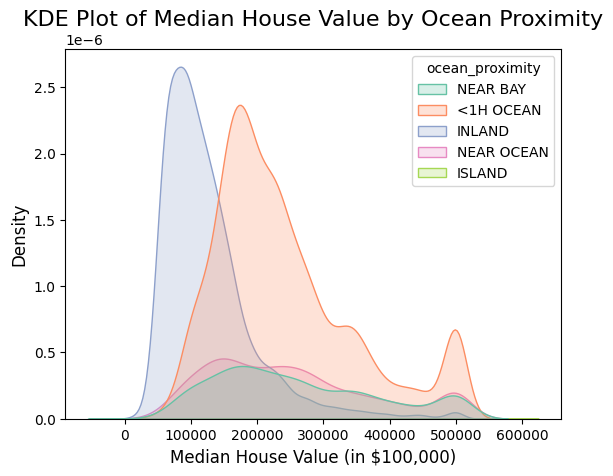

In [43]:
sns.kdeplot(data=df, x='median_house_value', hue='ocean_proximity', fill=True, palette='Set2')
plt.title('KDE Plot of Median House Value by Ocean Proximity', fontsize=16)
plt.xlabel('Median House Value (in $100,000)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

This KDE (Kernel Density Estimation) plot visualizes the distribution of **`median_house_value`** for each **`ocean_proximity`** category:
- The **`hue`** parameter colors the density curves based on **`ocean_proximity`**, allowing easy comparison between different proximity categories.
- The **fill** option shades the area under the curve, providing a clearer visual representation of the distribution.
- The **Set2 palette** helps differentiate between proximity categories with distinct colors.
- This plot reveals the shape of the house value distribution across proximity categories and helps in understanding how house values are spread for each category.

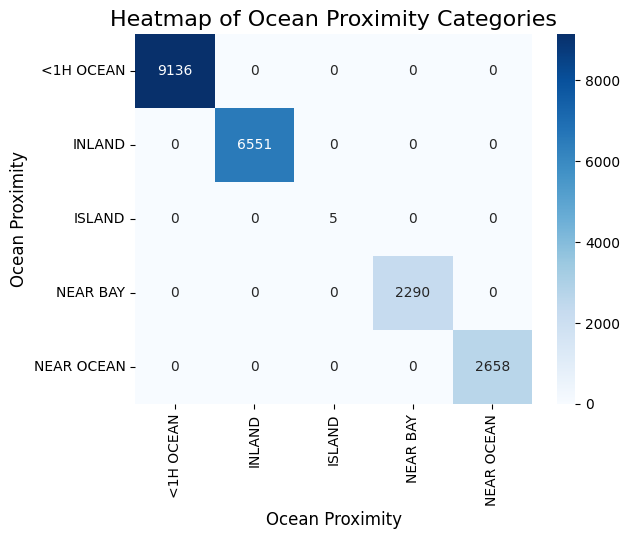

In [45]:
contingency_table = pd.crosstab(df['ocean_proximity'], df['ocean_proximity'])

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')

plt.title('Heatmap of Ocean Proximity Categories', fontsize=16)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Ocean Proximity', fontsize=12)

plt.show()


This heatmap shows the relationship between different categories of **`ocean_proximity`**:
- The **contingency table** is created by cross-tabulating **`ocean_proximity`** against itself to visualize how each category relates to others.
- The **annot=True** parameter annotates each cell with the count value.
- The **Blues color palette** is used to represent the values, with darker colors indicating higher frequencies.
- The plot provides an understanding of how the different proximity categories interact, although it is not particularly meaningful in this case with identical rows and coumns.


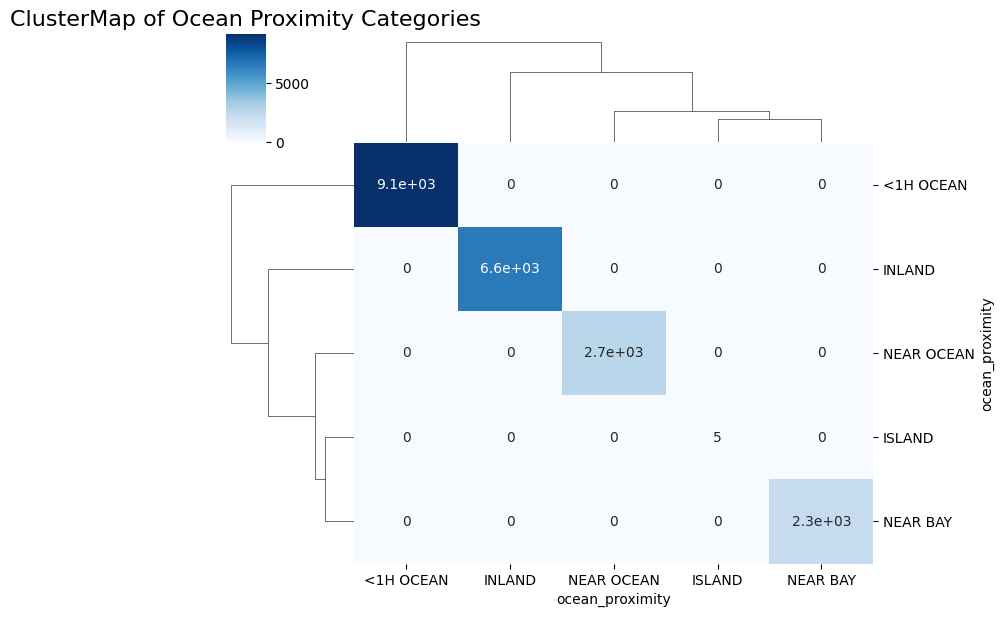

In [46]:
sns.clustermap(contingency_table, cmap='Blues', annot=True, figsize=(8, 6))

plt.title('ClusterMap of Ocean Proximity Categories', fontsize=16)

plt.show()



This ClusterMap visualizes the similarity between different categories of **`ocean_proximity`**:
- A **contingency table** is created by cross-tabulating **`ocean_proximity`** against itself to examine the relationship between the categories.
- The **clustering** of the rows and columns allows us to see which categories are more similar to each other based on the frequency of occurrences.
- The **Blues color palette** is used to represent the count values, with darker shades indicating higher frequencies.
- The **annotations** on the heatmap cells show the exact count of each category pair.
- This plot helps identify how the proximity categories cluster together based on their frequency distribution.


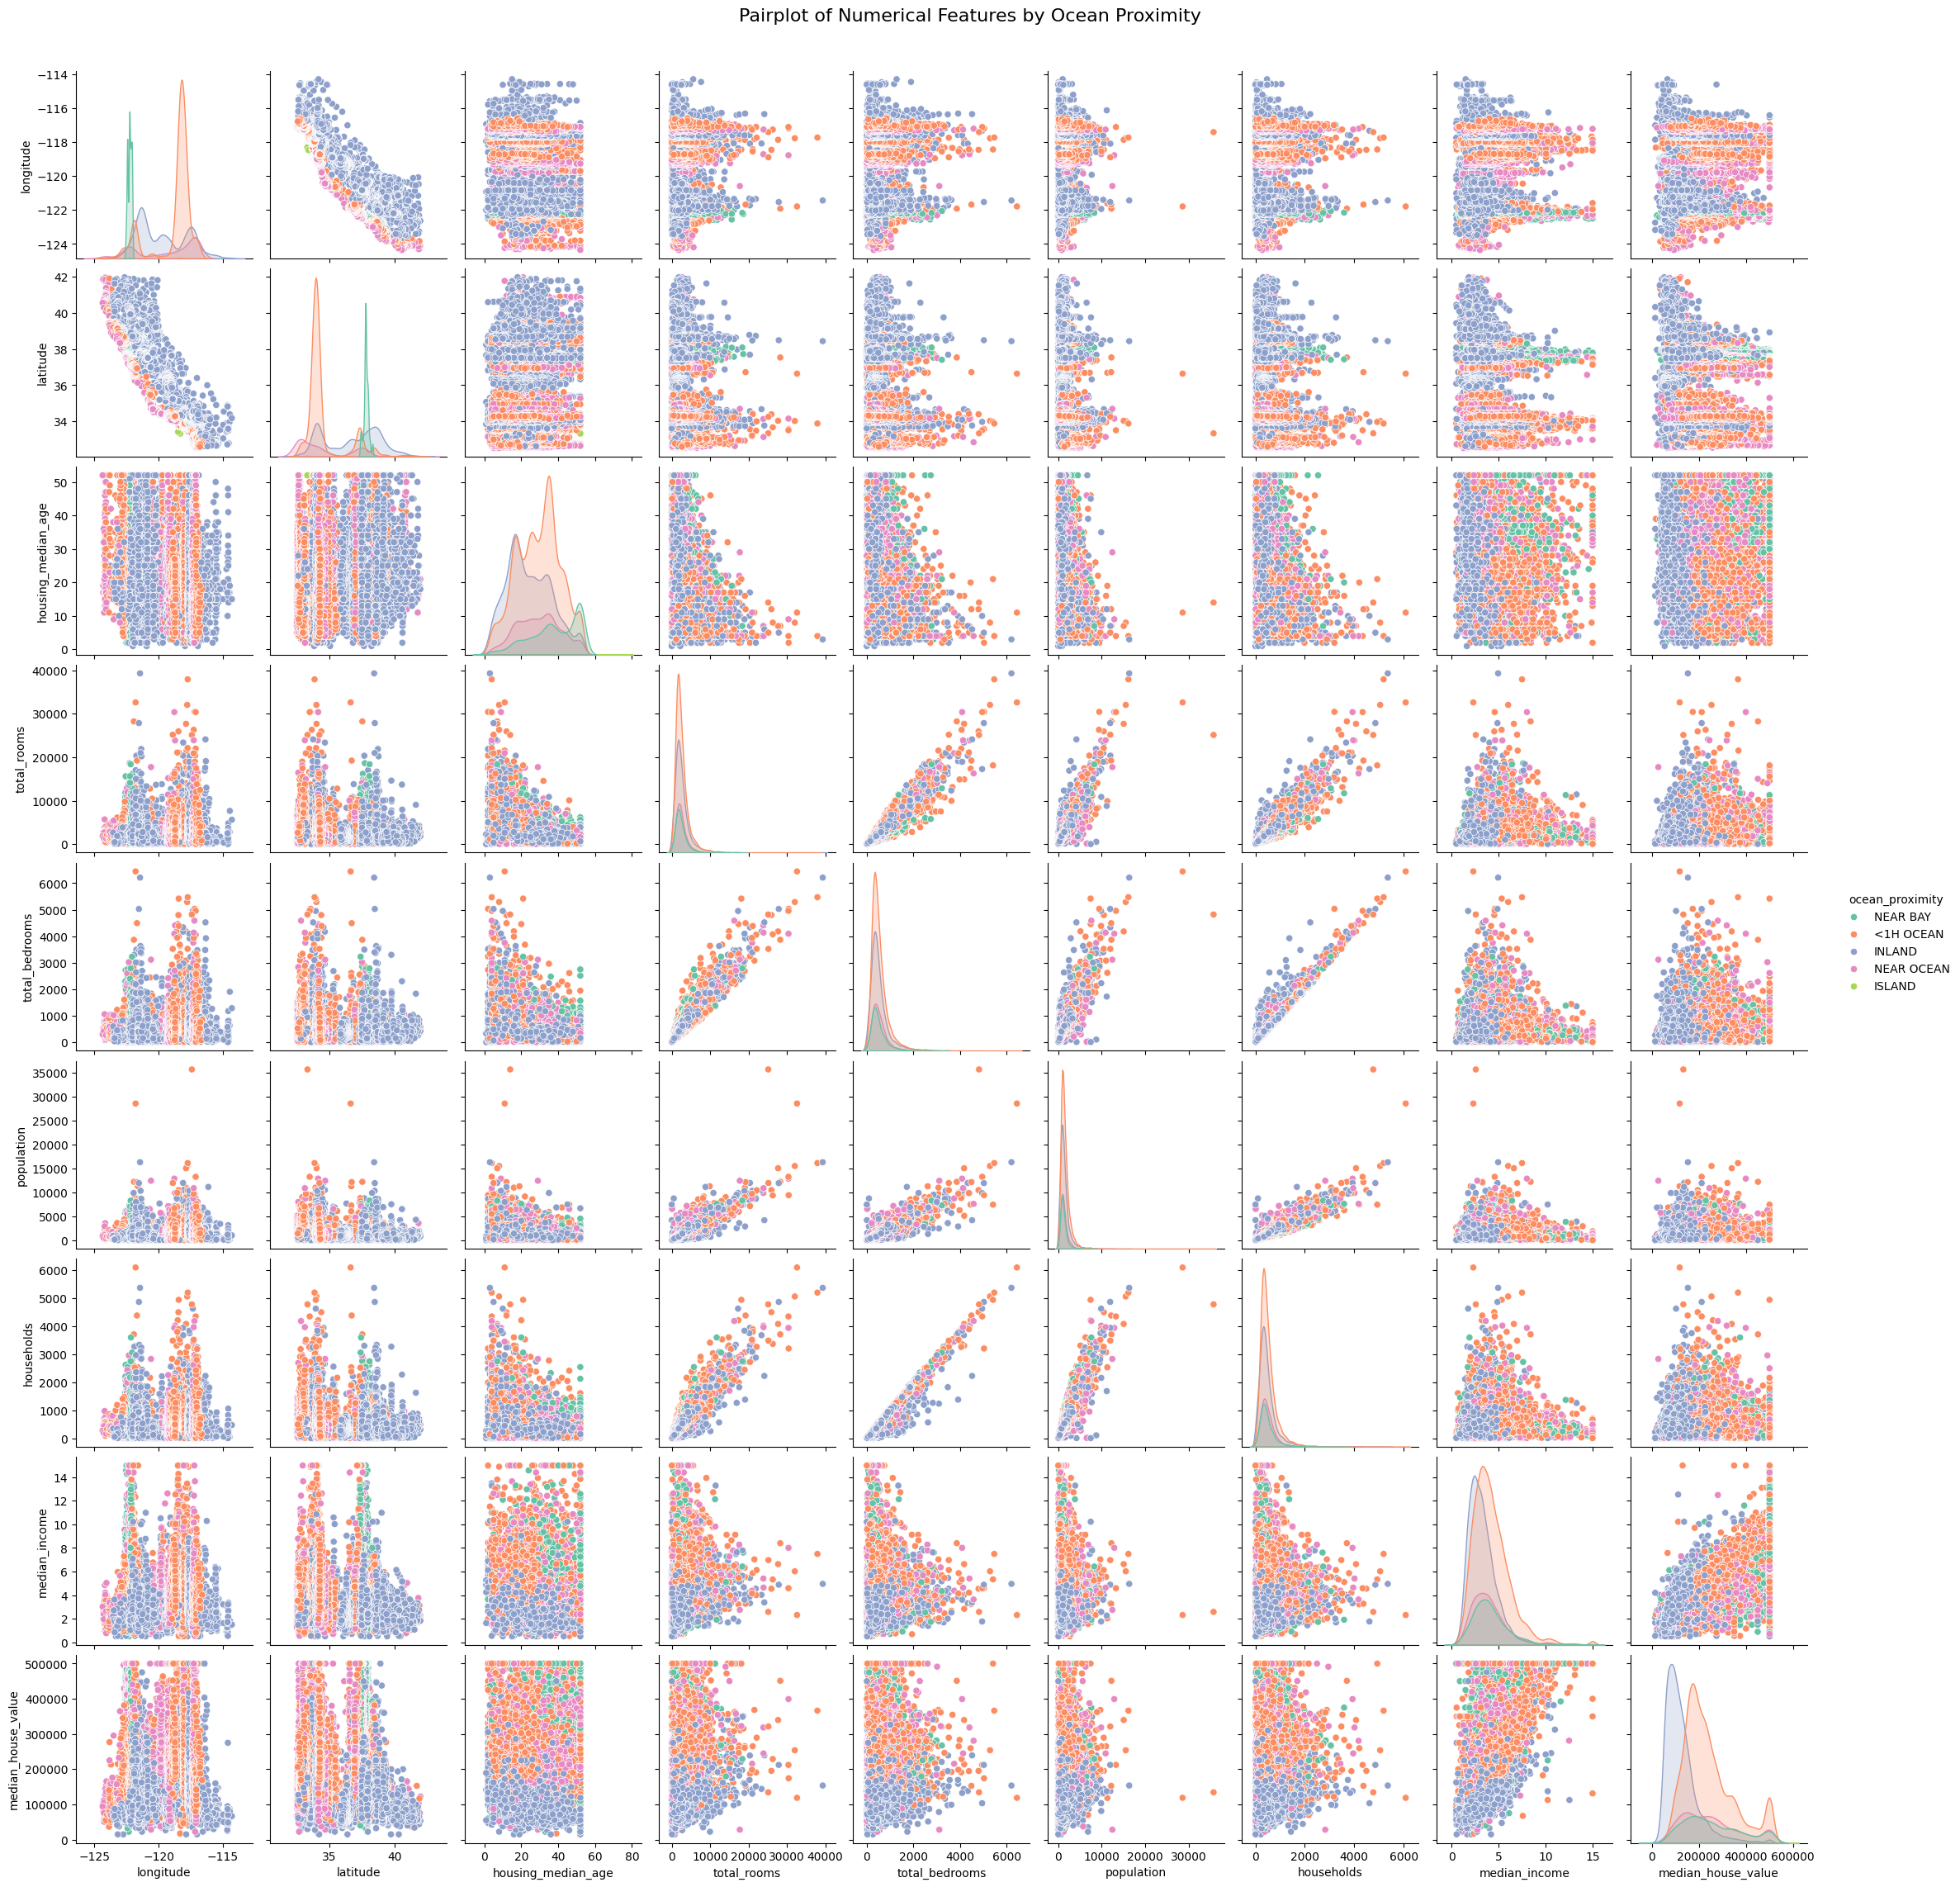

In [47]:
sns.pairplot(df, hue='ocean_proximity', palette='Set2', diag_kind='kde')

plt.suptitle('Pairplot of Numerical Features by Ocean Proximity', fontsize=16, y=1.02)

plt.show()


This pairplot visualizes the pairwise relationships between the numerical features in the dataset, grouped by the **`ocean_proximity`** category:
- **`hue='ocean_proximity'`** colors the points based on the different proximity categories, allowing easy visual differentiation between them.
- The **`diag_kind='kde'`** option replaces the diagonal histograms with Kernel Density Estimation (KDE) plots, showing the distribution of each numerical feature.
- The scatterplots on the off-diagonal show the relationships between pairs of numerical features, while the KDE plots on the diagonal provide insights into the distribution of each numerical feature.
- The **Set2 color palette** is used to differentiate between categories of **`ocean_proximity`**.

This pairplot helps in visualizing potential correlations and patterns between the numerical features of the dataset, while also providing insights into how these features vary by proximity to the ocean.


**Feature Engineering**

In [326]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

In [327]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [328]:
df = df[(np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

In [329]:
df['log_median_house_value'] = np.log(df['median_house_value'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_7636\371334090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_median_house_value'] = np.log(df['median_house_value'])


In [330]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   
5    -122.25     37.85                  52          919           213.0   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
2         496         177         7.2574              352100        NEAR BAY   
3         558         219         5.6431              341300        NEAR BAY   
4         565         259         3.8462              342200        NEAR BAY   
5         413         193         4.0368              269700        NEAR BAY   

   log_median_house_value  
0               13.022764  
2               12.771671  
3               12.740517  
4               12.743151  
5               12.505066

In [331]:
df.shape

(18907, 11)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19746 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               19746 non-null  float64
 1   latitude                19746 non-null  float64
 2   housing_median_age      19746 non-null  int64  
 3   total_rooms             19746 non-null  int64  
 4   total_bedrooms          19746 non-null  float64
 5   population              19746 non-null  int64  
 6   households              19746 non-null  int64  
 7   median_income           19746 non-null  float64
 8   median_house_value      19746 non-null  int64  
 9   ocean_proximity         19746 non-null  object 
 10  log_median_house_value  19746 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.8+ MB


In [290]:
X = df.drop(columns=['median_house_value', 'log_median_house_value'])
y = df['log_median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [308]:
tnf1 = ColumnTransformer(transformers = [
    ('scaler',StandardScaler(),[0,1,2,3,4,5,6,7]),
    ('encoder', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown='ignore'), [-1]),
],remainder = 'passthrough')

In [312]:
pipeline = Pipeline([
    ('tnf1',tnf1),
    ('tnf2',RandomForestRegressor(n_estimators=100, random_state=42))
])

In [314]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tnf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7]),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [-1])])),
                ('tnf2', RandomForestRegressor(random_state=42))])

In [315]:
y_pred = pipeline.predict(X_test)

In [316]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.05
Mean Absolute Error (MAE): 0.16
R-squared (R²): 0.84


In [322]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of R²: {np.std(cv_scores):.2f}")

C:\phthon3.11\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-Validation R² Scores: [0.60886598 0.54083866 0.66577245 0.35167943 0.73508133]
Mean R²: 0.58
Standard Deviation of R²: 0.13


**Saving the Model**

In [323]:
import joblib

In [325]:
joblib.dump(pipeline, 'house_price_prediction.pkl')
print("Model saved successfully!")

Model saved successfully!
